In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\project\survey_results_public.csv")

In [3]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [4]:
df.shape

(83439, 48)

In [5]:
df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [6]:
df = df[["Country","EdLevel","YearsCode","Employment","ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly":"Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCode,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
1,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Student, full-time",NaN
2,Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,"Student, full-time",NaN
3,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Employed full-time,NaN
4,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",NaN


In [7]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCode,Employment,Salary
0,Slovakia,"Secondary school (e.g. American high school, G...",NaN,"Independent contractor, freelancer, or self-em...",62268.0
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7,Employed full-time,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,Employed full-time,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15,Employed full-time,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Employed full-time,17748.0


In [8]:
df = df.dropna()
df.isna().sum()

Country       0
EdLevel       0
YearsCode     0
Employment    0
Salary        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46446 entries, 9 to 83438
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     46446 non-null  object 
 1   EdLevel     46446 non-null  object 
 2   YearsCode   46446 non-null  object 
 3   Employment  46446 non-null  object 
 4   Salary      46446 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.1+ MB


In [10]:
df = df[df["Employment"]=="Employed full-time"]
df = df.drop("Employment", axis=1)
df.head()

,Country,EdLevel,YearsCode,Salary
9,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",7,51552.0
11,Spain,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,46482.0
12,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15,77290.0
16,Turkey,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,17748.0
17,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,46135.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40290 entries, 9 to 83438
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    40290 non-null  object 
 1   EdLevel    40290 non-null  object 
 2   YearsCode  40290 non-null  object 
 3   Salary     40290 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [12]:
df.Country.value_counts()

United States of America                                9189
India                                                   3399
Germany                                                 2754
United Kingdom of Great Britain and Northern Ireland    2606
Canada                                                  1554
                                                        ... 
Cape Verde                                                 1
Burundi                                                    1
Mauritania                                                 1
Lao People's Democratic Republic                           1
Djibouti                                                   1
Name: Country, Length: 166, dtype: int64

In [13]:
def shorten_categories(categories,cuttoff):
    categorical_map = {}

    for i in range(len(categories)):
        if categories.values[i]> cuttoff:
            categorical_map[categories.index[i]]=categories.index[i]
        else:
            categorical_map[categories.index[i]]="Others"
    return categorical_map

In [14]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df["Country"] = df.Country.map(country_map)
df.Country.value_counts()

Others                                                  10747
United States of America                                 9189
India                                                    3399
Germany                                                  2754
United Kingdom of Great Britain and Northern Ireland     2606
Canada                                                   1554
France                                                   1397
Brazil                                                   1346
Spain                                                     895
Netherlands                                               838
Australia                                                 826
Poland                                                    776
Italy                                                     761
Russian Federation                                        740
Sweden                                                    733
Turkey                                                    459
Switzerl

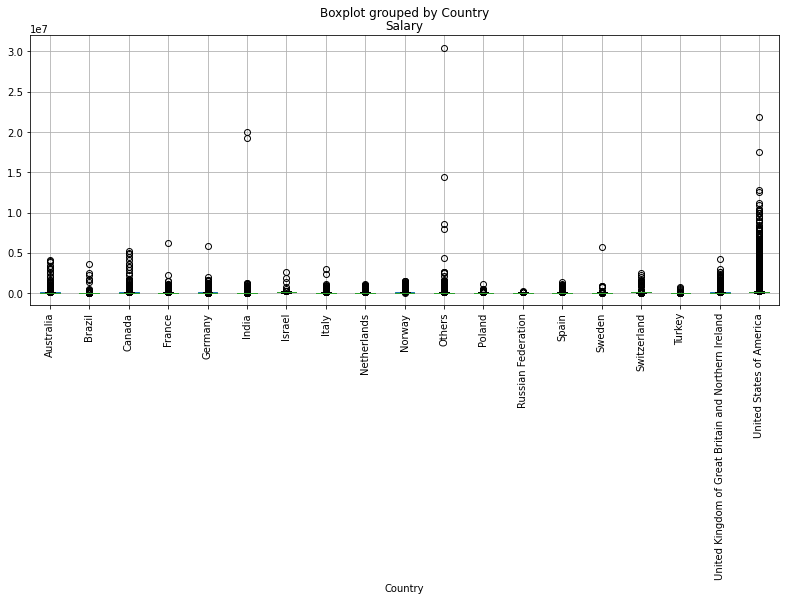

In [15]:
fig, ax = plt.subplots(1,1, figsize=(13,5))
df.boxplot("Salary", "Country", ax=ax)
plt.xticks(rotation = 90)
plt.show()

In [16]:
df = df[df["Salary"]<=250000]
df = df[df["Salary"]>=100000]
df = df[df["Country"]!="Others"]

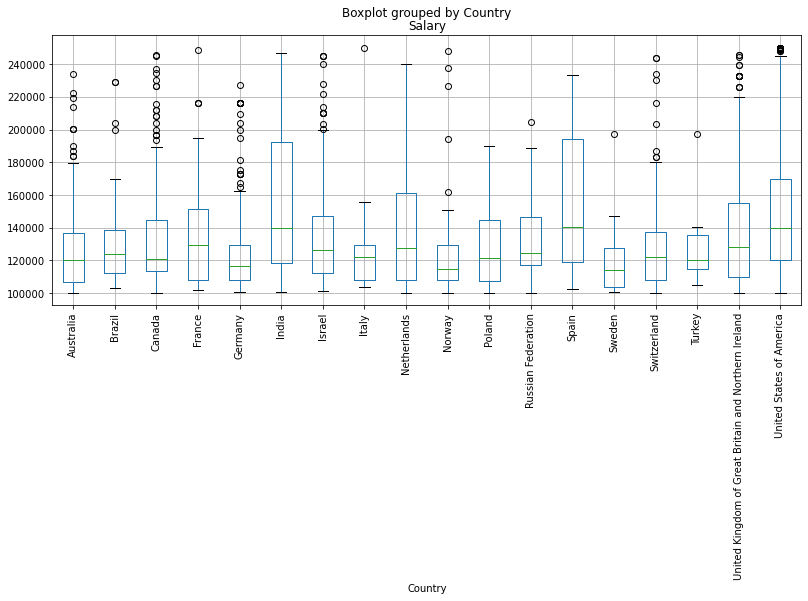

In [17]:
fig, ax = plt.subplots(1,1, figsize=(13,5))
df.boxplot("Salary", "Country", ax=ax)
plt.xticks(rotation = 90)
plt.show()

In [18]:
df.columns

Index(['Country', 'EdLevel', 'YearsCode', 'Salary'], dtype='object')

In [19]:
df["YearsCode"].unique()

array(['4', '8', '13', '24', '25', '10', '18', '20', '38', '12', '6',
       '14', '41', '7', '9', '28', '30', '22', '21', '44', '35', '15',
       '39', '40', '5', '16', '36', '45', '33', '27', '23', '31', '42',
       '17', '1', '47', '50', '37', '11', '49', '26', '32', '19',
       'More than 50 years', '34', '29', '3', '46', '48', '43', '2',
       'Less than 1 year'], dtype=object)

In [20]:
def clean_experience(x):
    if x == "More than 50 years":
        return 50
    if x == "Less than 1 year":
        return 0.5
    return float(x)
df["YearsCode"] = df["YearsCode"].apply(clean_experience)

In [21]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)', 'Something else'],
      dtype=object)

In [22]:
def clean_education(x):
    if "Bachelor’s degree (B.A., B.S., B.Eng., etc.)" in x:
        return "Bachelor’s degree"
    if 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' in x:
        return "Master degree"
    if 'Professional degree (JD, MD, etc.)' in x:
        return "Pro Degree"
    return "Less than a Bachelors"

df["EdLevel"] = df["EdLevel"].apply(clean_education)
    

In [23]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master degree',
       'Pro Degree'], dtype=object)

In [24]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
df["EdLevel"] = le_encoder.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([0, 1, 2, 3])

In [25]:
df["Country"].unique()

array(['Israel', 'United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Canada',
       'Netherlands', 'Switzerland', 'India', 'France', 'Germany',
       'Poland', 'Norway', 'Italy', 'Brazil', 'Turkey', 'Sweden',
       'Australia', 'Spain', 'Russian Federation'], dtype=object)

In [26]:
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])
df["Country"].unique()

array([ 6, 17, 16,  2,  8, 14,  5,  3,  4, 10,  9,  7,  1, 15, 13,  0, 12,
       11])

In [27]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [28]:
y.values

array([122580., 103000., 130000., ..., 129718., 125000., 160500.])

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y.values )

LinearRegression()

In [30]:
y_pred = lin_reg.predict(X)

In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
error = np.sqrt(mean_squared_error(y,y_pred))

In [32]:
error

36096.83637690802

In [33]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
dec_tree_reg.fit(X,y.values)

DecisionTreeRegressor()

In [34]:
y_pred = dec_tree_reg.predict(X)

In [35]:
y_pred

array([122580.        , 137723.17647059, 152821.22641509, ...,
       113773.25      , 155735.48387097, 135932.06122449])

In [36]:
error = np.sqrt(mean_squared_error(y,y_pred))

In [37]:
error

33494.10775373385

In [38]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X, y.values)

RandomForestRegressor()

In [39]:
y_pred = random_forest_reg.predict(X)

In [40]:
error = np.sqrt(mean_squared_error(y, y_pred))

In [41]:
error

33625.10819243287

In [42]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth":max_depth}

regressor = DecisionTreeRegressor()
gs = GridSearchCV(regressor, parameters, scoring="neg_mean_squared_error")
gs.fit(X,y.values)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [43]:
regressor = gs.best_estimator_

regressor.fit(X,y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y,y_pred))
error

35536.29730225623

In [44]:
X

,Country,EdLevel,YearsCode
31,6,0,4.0
36,17,0,8.0
62,17,0,13.0
69,16,0,24.0
75,17,0,25.0
...,...,...,...
83387,2,1,40.0
83389,17,0,9.0
83424,4,0,17.0
83430,17,2,23.0


In [45]:
# X that the user will insert on the app

X = np.array([["India","Master degree",20]])
X

array([['India', 'Master degree', '20']], dtype='<U13')

In [46]:
#These user input will be preprocess first
X[:,0] = le_country.transform(X[:,0])
X[:,1] = le_encoder.transform(X[:,1])
X = X.astype(float)
X

array([[ 5.,  2., 20.]])

In [47]:
y_pred = regressor.predict(X)
round(y_pred[0],2)

133340.11

In [48]:
# we need to save our model

import pickle

In [49]:
data = {"model": regressor, "le_country":le_country, "le_education":le_encoder}
with open("saved_steps.pkl","wb") as file:
    pickle.dump(data,file)

In [50]:
with open("saved_steps.pkl","rb") as file:
    data = pickle.load(file)
    
print(data)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

{'model': DecisionTreeRegressor(max_depth=4), 'le_country': LabelEncoder(), 'le_education': LabelEncoder()}


In [51]:
y_pred = regressor_loaded.predict(X)
y_pred

array([133340.10947562])